**MNIST Handwritten Digit Clasification using Deep Learning (Neural Network)**


Importing the Dependencies


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras.datasets


In [2]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Training data = 60,000 Images

Test data = 10,000 Images


Image dimension --> 28 x 28

Grayscale Image --> 1 channel


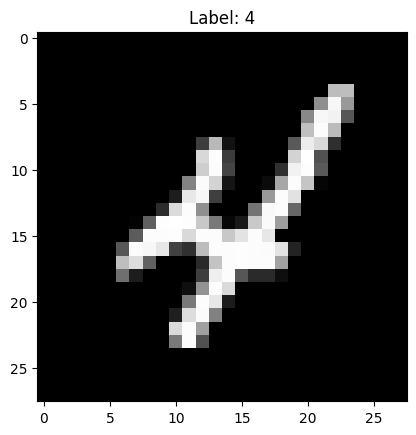

In [9]:
# print the 10th image
plt.imshow(X_train[9], cmap='gray')
plt.title(f"Label: {Y_train[9]}")
plt.show()

In [10]:
# print 10 th image shape

print(X_train[9].shape)

(28, 28)


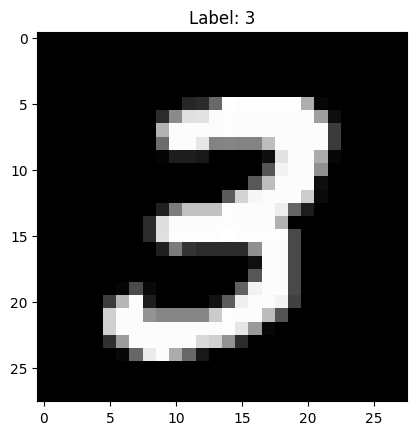

In [11]:
# displaying the image

# print the corresponding label

image = 7

plt.imshow(X_train[image], cmap='gray')
plt.title(f"Label: {Y_train[image]}")
plt.show()


Image Lables


In [13]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [12]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Encoding


All the images have the same dimensions in this dataset, If not, we have to resize all the images to a common dimension


In [14]:
# scaling the values

X_train = X_train/255
X_test = X_test/255

In [17]:
# printing the 10th image

print(X_train[9])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network


In [64]:
# setting up the layers of the Neural  Network

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='sigmoid'),
  # tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10,activation = "softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [65]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [66]:
# training the Neural Network

model.fit(X_train, Y_train, epochs=5)



Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8327 - loss: 0.6682
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9391 - loss: 0.2106
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9555 - loss: 0.1517
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9658 - loss: 0.1165
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9736 - loss: 0.0924


Training data accuracy = Your Accuracy Here


**Accuracy on Test data:**


In [67]:
test_loss, test_acc = model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9629 - loss: 0.1176


Test data accuracy = Write Accuracy Here


In [68]:
print(f"Test accuracy: {test_acc}")

Test accuracy: 0.9672999978065491


(28, 28)


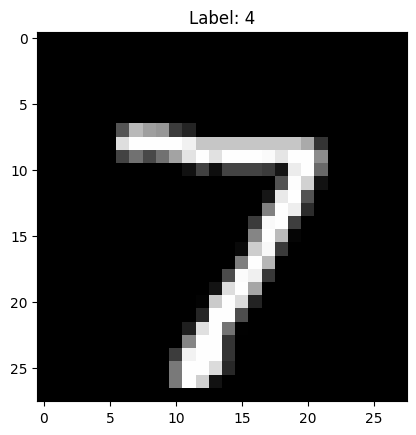

In [97]:
# first data point in X_test
print(X_test[0].shape)
plt.imshow(X_test[0], cmap='gray')
plt.title(f"Label: {Y_train[9]}")
plt.show()


In [35]:
print(Y_test[0])

7


In [71]:
#predict for X_test


ypred = model.predict(X_test)
print(ypred[0])
# print(ypred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[1.5113192e-05 2.1093116e-07 3.9562973e-04 3.4003488e-03 2.9619838e-07
 9.0841140e-06 8.4417406e-10 9.9607253e-01 6.5405338e-06 1.0011179e-04]


model.predict() gives the prediction probability of each class for that data point


In [73]:
# convert the prediction probabilities to class label

ylabels = [np.argmax(i) for i in ypred]

print(ylabels)




[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(6), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

In [ ]:
# convert the prediction probabilities to class label for all test data points


Y_test --> True labels

Y_pred_labels --> Predicted Labels


Confusin Matrix


Accuracy:  0.9673


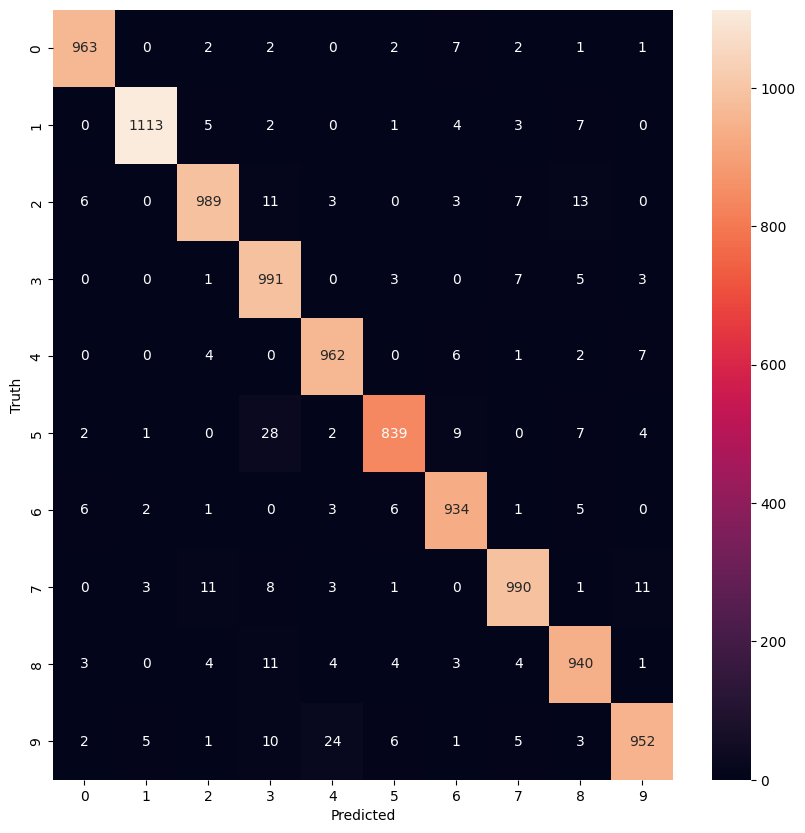

In [77]:
# Plot the confusion matrix between Y_test and Y_pred

cm = confusion_matrix(Y_test, ylabels)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')
# print accuracy
print('Accuracy: ', np.trace(cm)/np.sum(cm))


Building a Predictive System


In [137]:
input_image_path = '/content/WhatsApp Image 2025-05-12 at 13.45.46_dc517105.jpg'

input_image = cv2.imread(input_image_path)

In [138]:
type(input_image)

numpy.ndarray

In [139]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


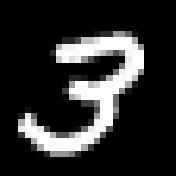

In [140]:
cv2_imshow(input_image)

In [141]:
input_image.shape

(176, 176, 3)

In [143]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [144]:
grayscale.shape

(176, 176)

In [145]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [146]:
input_image_resize.shape

(28, 28)

In [147]:
cv2_imshow(input_image_resize)

In [148]:
input_image_resize = input_image_resize/255

In [149]:
type(input_image_resize)


numpy.ndarray

(1, 28, 28)


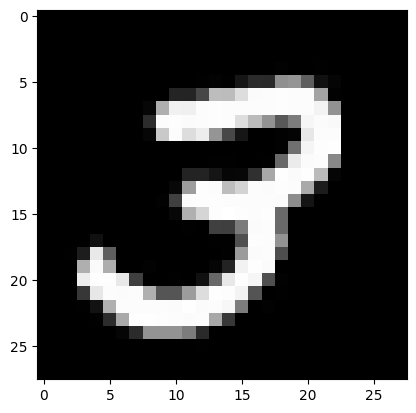

In [150]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

print(image_reshaped.shape)
arr_2d = image_reshaped.squeeze()

plt.imshow(arr_2d, cmap='gray')
plt.show()

In [151]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[1.7063489e-06 2.4108858e-06 4.1192801e-05 9.9965489e-01 9.7118580e-08
  1.6361418e-04 2.2647626e-09 2.3671306e-05 1.6021466e-05 9.6388321e-05]]


In [152]:
input_pred_label = np.argmax(input_prediction)

In [153]:
print(input_pred_label)

3


**Predictive System**


Path of the image to be predicted: /content/WhatsApp Image 2025-05-12 at 13.45.46_dc517105.jpg


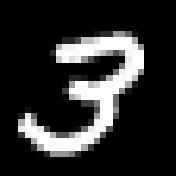

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
The Handwritten Digit is recognised as  3


In [154]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)